# 05 Auditoría de Desempeño para Negocios Digitales:

En este ejercicio vamos a analizar un dataset de transacciones y determinar si la estrategia de M-Commerce (App Móvil) es más rentable que el E-Commerce tradicional (Web Desktop).

In [22]:
import pandas as pd
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# Crear datos simulados
data = {
    'ID_Transaccion': range(1001, 1051),
    'Canal': np.random.choice(['Web Desktop', 'App Móvil'], 50, p=[0.4, 0.6]),
    'Metodo_Pago': np.random.choice(['Tarjeta Crédito', 'PayPal', 'Transferencia'], 50),
    'Total_Venta': np.random.randint(20, 500, 50), # Ventas entre $20 y $500
    'Categoria': np.random.choice(['Electrónica', 'Moda', 'Hogar'], 50)
}

df = pd.DataFrame(data)

df

,ID_Transaccion,Canal,Metodo_Pago,Total_Venta,Categoria
0,1001,Web Desktop,Transferencia,235,Moda
1,1002,App Móvil,PayPal,312,Moda
2,1003,App Móvil,PayPal,118,Electrónica
3,1004,App Móvil,PayPal,191,Moda
4,1005,Web Desktop,PayPal,379,Electrónica
5,1006,Web Desktop,PayPal,233,Electrónica
6,1007,Web Desktop,PayPal,494,Moda
7,1008,App Móvil,Transferencia,54,Moda
8,1009,App Móvil,Transferencia,468,Moda
9,1010,App Móvil,PayPal,246,Hogar


## ¿Qué preguntas deberíamos plantearnos para obtener las respuestas que buscamos?

Recuerda que buscamos saber si la estrategia de M-Commerce es más rentable que el E-Commerce

¿Qué canal recauda más ganancias?

Total de ventas por canal

### KPIS

1. Volumen de ventas por canal


In [23]:
volumen_ventas_canal = df.groupby('Canal')['Total_Venta'].sum()
print(volumen_ventas_canal)

Canal
App Móvil      6779
Web Desktop    5549
Name: Total_Venta, dtype: int32


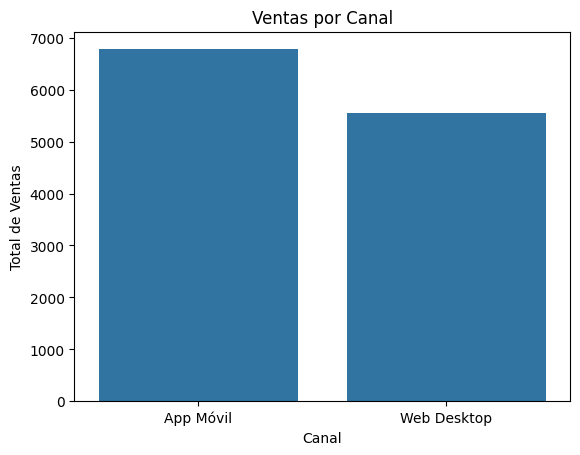

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

ventas_por_canal = df.groupby('Canal')['Total_Venta'].sum().reset_index()

sns.barplot(data=ventas_por_canal, x='Canal', y='Total_Venta')

plt.title('Ventas por Canal')
plt.xlabel('Canal')
plt.ylabel('Total de Ventas')
plt.show()

2. Ticket promedio

In [25]:
ticket_promedio = df['Total_Venta'].mean()
print ("Ticket promedio:")
print(ticket_promedio)

Ticket promedio:
246.56


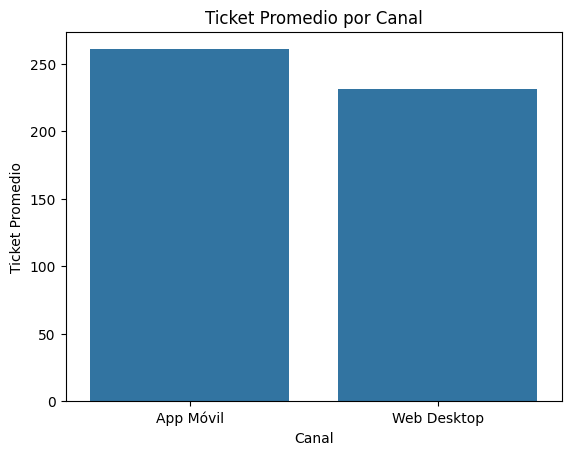

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

ticket_promedio = df.groupby('Canal')['Total_Venta'].mean().reset_index()

sns.barplot(data=ticket_promedio, x='Canal', y='Total_Venta')

plt.title('Ticket Promedio por Canal')
plt.xlabel('Canal')
plt.ylabel('Ticket Promedio')
plt.show()


3. Preferencia de pagos por canal

In [27]:
preferencia_pagos = (
    df.groupby(['Canal', 'Metodo_Pago'])
    .size()
    .reset_index(name='Cantidad')
)

print(preferencia_pagos)

         Canal      Metodo_Pago  Cantidad
0    App Móvil           PayPal         9
1    App Móvil  Tarjeta Crédito         8
2    App Móvil    Transferencia         9
3  Web Desktop           PayPal         5
4  Web Desktop  Tarjeta Crédito        11
5  Web Desktop    Transferencia         8


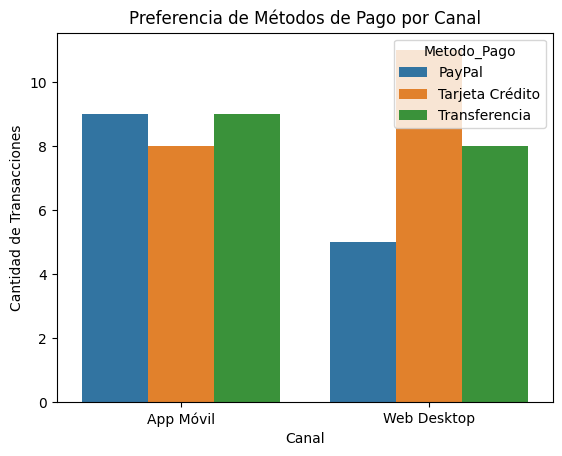

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=preferencia_pagos,
    x='Canal',
    y='Cantidad',
    hue='Metodo_Pago'
)

plt.title('Preferencia de Métodos de Pago por Canal')
plt.xlabel('Canal')
plt.ylabel('Cantidad de Transacciones')
plt.show()


4. Categoria por canal

In [29]:
categoria_canal = (
    df.groupby(['Canal', 'Categoria'])
    .size()
    .reset_index(name='Cantidad')
)

print(categoria_canal)


         Canal    Categoria  Cantidad
0    App Móvil  Electrónica        10
1    App Móvil        Hogar         6
2    App Móvil         Moda        10
3  Web Desktop  Electrónica        10
4  Web Desktop        Hogar         7
5  Web Desktop         Moda         7


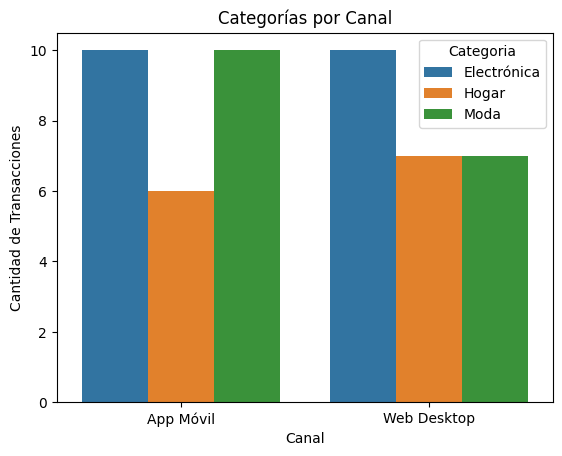

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=categoria_canal,
    x='Canal',
    y='Cantidad',
    hue='Categoria'
)

plt.title('Categorías por Canal')
plt.xlabel('Canal')
plt.ylabel('Cantidad de Transacciones')
plt.show()